## 観測データからのパラメータ推定

X, Y の真の関係を Y = 2 + 3X とする。
真の関係をもとに生成、観測されるデータはばらつきを含む。
そのばらつきを正規分布に基づいて生成される乱数により与えたデータセットを作成し、そのデータセットから線形回帰モデルを作成、推定されたパラメータと真の関係のパラメータを比較する。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# X データの作成
# データの間隔数（データ数は +1）
N = 100
X_min = -2
X_max = 2
X_step = (X_max - X_min) / N
X = np.arange(X_min, X_max + X_step, X_step)

# 真の関係を表すデータ
Y_real = 2 + 3 * X

<AxesSubplot:>

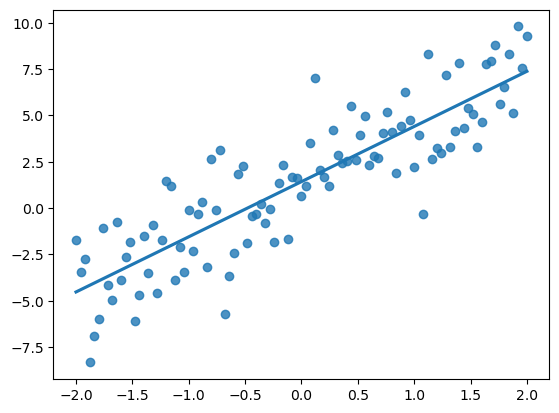

In [2]:
# 正規分布の乱数
# - 平均：    0
# - 標準偏差： 2
# - 個数：    N + 1
Y_rand = np.random.normal(0, 2, N + 1)

# Y データの作成
Y = Y_real + Y_rand

# 回帰直線付きの散布図
sns.regplot(x=X, y=Y, ci=None)

In [ ]:
# 線形単回帰モデルの作成
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# モデルの学習
model.fit(X.reshape(101,1), Y)

# coefficient: 係数
# intercept  : 切片
print('coefficient={:.3f}, intercept={:.3f}'.format(model.coef_[0], model.intercept_))

# 散布図に回帰直線を重ねて描画
sns.scatterplot(x=X, y=Y)

# モデルによる予測
Y_predict = model.predict(X.reshape(101,1))

# 回帰直線を描画
plt.plot(X, Y_predict, color='gray')

# 真の関係を描画
plt.plot(X, Y_real, color='red')

In [ ]:
cmap = plt.get_cmap("tab10")

def do_simple_regression(i):
    # 観測データの作成
    # - 標準偏差： 2
    Y_rand = np.random.normal(0, 2, N + 1)
    Y = Y_real + Y_rand
    # モデルの作成
    model = LinearRegression()
    model.fit(X.reshape(101,1), Y)
    Y_predict = model.predict(X.reshape(101,1))
    print('{}: coefficient={:.3f}, intercept={:.3f}'.format(i, model.coef_[0], model.intercept_))
    # 回帰直線の描画
    plt.plot(X, Y_predict, linewidth=0.5, linestyle='dotted', color=cmap(i))
    
for i in range(0, 10):
    do_simple_regression(i)

# 真の関係を描画
plt.plot(X, Y_real, linewidth=2, color='red')